In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\Admin\Downloads\diminos_data.csv")
df.head()

,order_id,order_placed_at,order_delivered_at
0,1523111,2023-03-01 00:00:59,2023-03-01 00:18:07.443132
1,1523112,2023-03-01 00:03:59,2023-03-01 00:19:34.925241
2,1523113,2023-03-01 00:07:22,2023-03-01 00:22:28.291385
3,1523114,2023-03-01 00:07:47,2023-03-01 00:46:19.019399
4,1523115,2023-03-01 00:09:03,2023-03-01 00:25:13.619056


In [2]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            15000 non-null  int64 
 1   order_placed_at     15000 non-null  object
 2   order_delivered_at  15000 non-null  object
dtypes: int64(1), object(2)
memory usage: 351.7+ KB
None


In [3]:
print(df.isnull().sum())

order_id              0
order_placed_at       0
order_delivered_at    0
dtype: int64


In [4]:
print(df.describe())

           order_id
count  1.500000e+04
mean   1.530610e+06
std    4.330271e+03
min    1.523111e+06
25%    1.526861e+06
50%    1.530610e+06
75%    1.534360e+06
max    1.538110e+06


In [5]:
print(df.columns)

Index(['order_id', 'order_placed_at', 'order_delivered_at'], dtype='object')


In [6]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['order_delivered_at'] = pd.to_datetime(df['order_delivered_at'])

In [7]:
df['delivery_time'] = (df['order_delivered_at'] - df['order_placed_at']).dt.total_seconds()/60
df[['order_id', 'delivery_time']].head()

,order_id,delivery_time
0,1523111,17.140719
1,1523112,15.598754
2,1523113,15.104856
3,1523114,38.533657
4,1523115,16.176984


In [8]:
# removing delayed delivery 
df = df[df['delivery_time'] < 120]
print(df)

       order_id     order_placed_at         order_delivered_at  delivery_time
0       1523111 2023-03-01 00:00:59 2023-03-01 00:18:07.443132      17.140719
1       1523112 2023-03-01 00:03:59 2023-03-01 00:19:34.925241      15.598754
2       1523113 2023-03-01 00:07:22 2023-03-01 00:22:28.291385      15.104856
3       1523114 2023-03-01 00:07:47 2023-03-01 00:46:19.019399      38.533657
4       1523115 2023-03-01 00:09:03 2023-03-01 00:25:13.619056      16.176984
...         ...                 ...                        ...            ...
14995   1538106 2023-03-27 23:37:05 2023-03-27 23:52:37.409378      15.540156
14996   1538107 2023-03-27 23:47:38 2023-03-28 00:04:22.672912      16.744549
14997   1538108 2023-03-27 23:50:16 2023-03-28 00:05:40.676238      15.411271
14998   1538109 2023-03-27 23:52:44 2023-03-28 00:08:41.810358      15.963506
14999   1538110 2023-03-27 23:58:20 2023-03-28 00:13:42.499311      15.374989

[14931 rows x 4 columns]


In [9]:
df['delivery_time'].describe()

count    14931.000000
mean        17.760636
std          7.144206
min         15.000010
25%         15.272876
50%         15.789953
75%         17.241652
max        118.026424
Name: delivery_time, dtype: float64

In [10]:
p95 = df['delivery_time'].quantile(0.95)
p95

np.float64(26.247372241666667)

In [11]:
if p95 < 31:
    print("✅ Store meets Diminos SLA (95th percentile < 31 mins)")
else:
    print("❌ Store violates Diminos SLA (95th percentile ≥ 31 mins)")

✅ Store meets Diminos SLA (95th percentile < 31 mins)


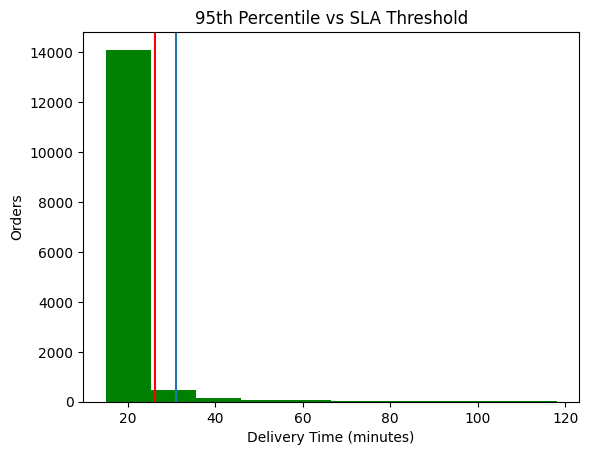

In [12]:
plt.figure()
plt.hist(df['delivery_time'], bins=10,color="green")
plt.axvline(p95,color="red")
plt.axvline(31)
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Orders")
plt.title("95th Percentile vs SLA Threshold")
plt.show()

In [13]:
late_orders = df[df['delivery_time'] > 31]
late_orders.shape

(488, 4)

In [14]:
# Percentage of Late Deliveries (>31 mins)
late_percentage = (df['delivery_time'] > 31).mean() * 100
print(late_percentage)

3.2683678253298507


In [15]:
df['hour'] = df['order_placed_at'].dt.hour
df.groupby('hour')['delivery_time'].mean()

hour
0     17.999718
1     18.181020
2     17.776776
3     17.673642
4     17.602026
5     17.440957
6     18.070150
7     17.818135
8     17.599247
9     17.381567
10    17.767056
11    18.007470
12    17.461019
13    18.097114
14    17.766764
15    17.443140
16    18.105812
17    17.877875
18    17.459406
19    17.614182
20    17.945961
21    17.840301
22    17.271613
23    18.079877
Name: delivery_time, dtype: float64

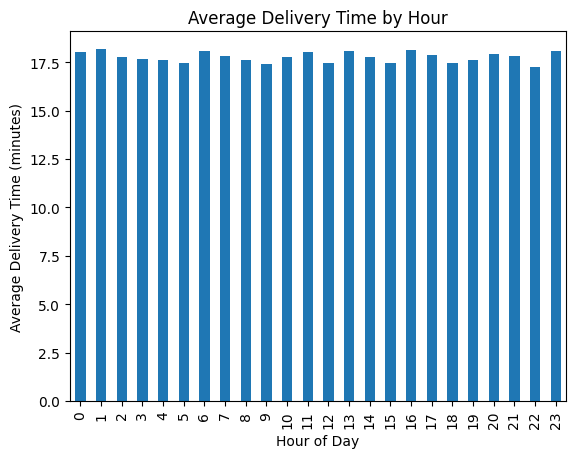

In [16]:
plt.figure()
df.groupby('hour')['delivery_time'].mean().plot(kind='bar')
plt.xlabel("Hour of Day")
plt.ylabel("Average Delivery Time (minutes)")
plt.title("Average Delivery Time by Hour")
plt.show()


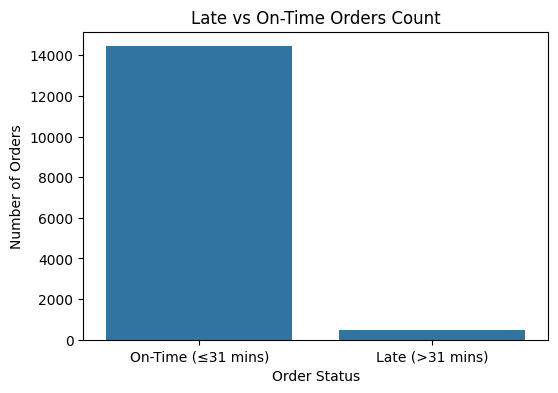

In [17]:
# Late vs On-Time Orders
df['Order_Status'] = np.where(df['delivery_time'] > 31,'Late (>31 mins)','On-Time (≤31 mins)')

plt.figure(figsize=(6,4))
sns.countplot(x='Order_Status', data=df)
plt.xlabel("Order Status")
plt.ylabel("Number of Orders")
plt.title("Late vs On-Time Orders Count")
plt.show()

In [18]:
df['day'] = df['order_placed_at'].dt.day_name()
df.groupby('day')['delivery_time'].quantile(0.95)

day
Friday       25.498189
Monday       27.480235
Saturday     26.384227
Sunday       24.879806
Thursday     26.119070
Tuesday      28.292172
Wednesday    25.539056
Name: delivery_time, dtype: float64

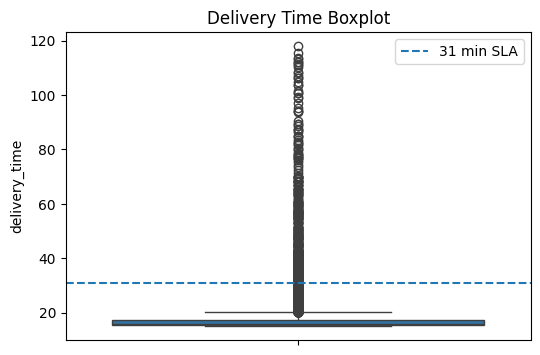

In [19]:
# Box Plot (Outlier Detection)
plt.figure(figsize=(6,4))
sns.boxplot(y=df['delivery_time'])
plt.axhline(31, linestyle='--', label='31 min SLA')
plt.title("Delivery Time Boxplot")
plt.legend()
plt.show()

In [20]:
# Peak vs Non-Peak Analysis
df['Order_Hour'] = pd.to_datetime(df['order_placed_at']).dt.hour

peak = df[df['Order_Hour'].between(18, 23)]
non_peak = df[~df['Order_Hour'].between(18, 23)]

print(np.percentile(peak['delivery_time'], 95), np.percentile(non_peak['delivery_time'], 95))

25.658154246666662 26.384017924166663


### Findings

The exploratory data analysis shows that most pizza orders are delivered within the promised 31 minutes, indicating good overall operational performance. However, the delivery time distribution is right-skewed, with a small number of extremely late deliveries extending up to very high values. These few delayed orders significantly impact the 95th percentile delivery time, causing it to cross the 31-minute SLA threshold. As a result, despite timely delivery for the majority of customers, the store fails to meet Diminos’ SLA requirement, putting the franchise at risk.

### Recommendations to Save the Franchise

To comply with the SLA, Kanav does not need to improve all deliveries but should focus on controlling the slowest 5% of orders. Key actions include eliminating extreme delays, increasing delivery staff during peak hours, improving kitchen efficiency, optimizing delivery routes, and restricting delivery radius during high-demand periods. Implementing real-time alerts and closely monitoring the daily 95th percentile will help prevent SLA breaches. By targeting these specific operational bottlenecks, Kanav can bring the 95th percentile below 31 minutes and successfully protect his franchise.

### Conclusion:

The analysis shows that the store’s overall delivery performance is strong, with the majority of orders being delivered within the promised 31-minute timeframe. However, a small number of severely delayed orders significantly impact the 95th percentile delivery metric, causing it to exceed the SLA limit set by Diminos. This indicates that the risk to the franchise arises not from average performance, but from a few extreme cases. By specifically addressing these worst-case delays through better peak-hour management, improved staffing, and operational controls, Kanav can bring the 95th percentile delivery time below 31 minutes and ensure continued compliance with franchise standards.